In [1]:
from utils_tables import *
import os 
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np

In [2]:
#Set-up
scal_folder="Res_Benchmark"
with cd(os.path.join(os.getcwd(),'..')):
    scal_path=os.path.join(os.path.join(os.getcwd(),scal_folder))
    assert os.path.isdir(scal_path), "Wrong folder"
#     print(scal_path)

# Table Results

In [3]:
table_files=[file for file in os.listdir(scal_path) if (".csv" in file) and ("Results" in file)]
metric_list=["Av_Best","Peak_Best","Eff_1"]
table_dict={}
for file in table_files:
    Dataset=file.split("Results_")[1].split(".csv")[0]
    df=pd.read_csv(os.path.join(scal_path,file))
    df["Dataset"]=df.apply(lambda row: Dataset, axis=1)
    df=normalise_metrics(df,metric_list)
    table_dict[Dataset]=df
    
benchmark_table=pd.concat(table_dict.values())



In [9]:
benchmark_summary=benchmark_table.copy()

benchmark_summary=benchmark_summary.drop(columns=["Eff_1","Av_Best_unit","Peak_Best_unit","Eff_1_unit","NImprovements"])

benchmark_summary=benchmark_summary.rename(columns={"Imp": "Heuristics", "Av_Best": "MBF","Peak_Best": "Peak Best"})
benchmark_summary["Heuristics"]=benchmark_summary["Heuristics"].replace(["impr1","impr2","impr3","impr4","impr5"],
                                                                        ["Path Cut","Inverse two","Inverse n","Small greedy","Big greedy"])
summary_path=os.path.join(scal_path,"BenchmarkSummary.csv")
benchmark_summary=round(benchmark_summary,3)

benchmark_summary.to_csv(summary_path,index=False)

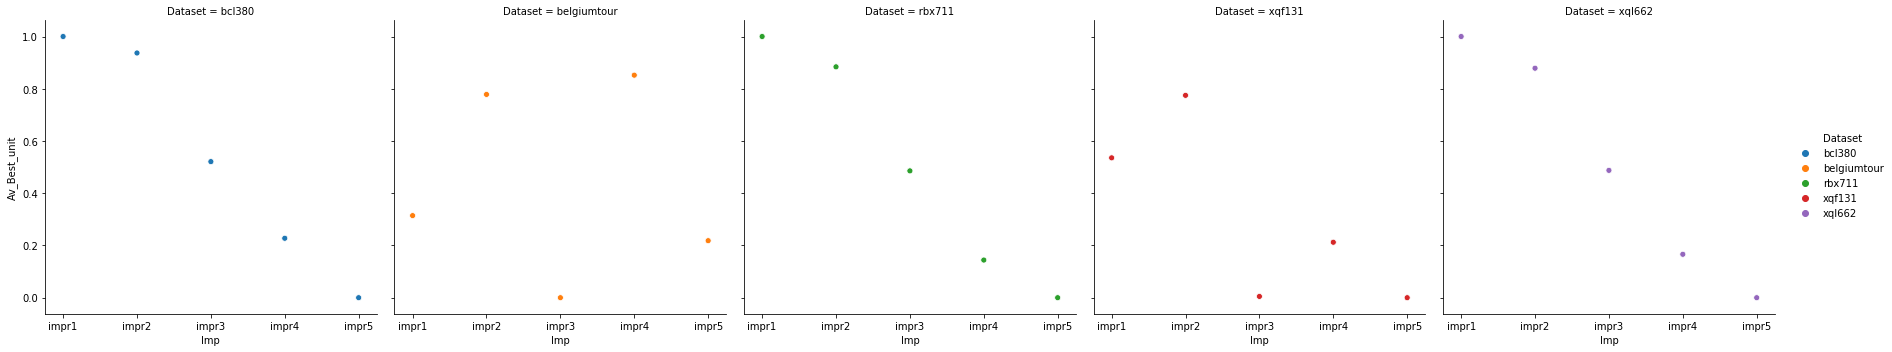

In [5]:
sns.relplot(x="Imp", y="Av_Best_unit", hue="Dataset",col="Dataset" ,data=benchmark_table);

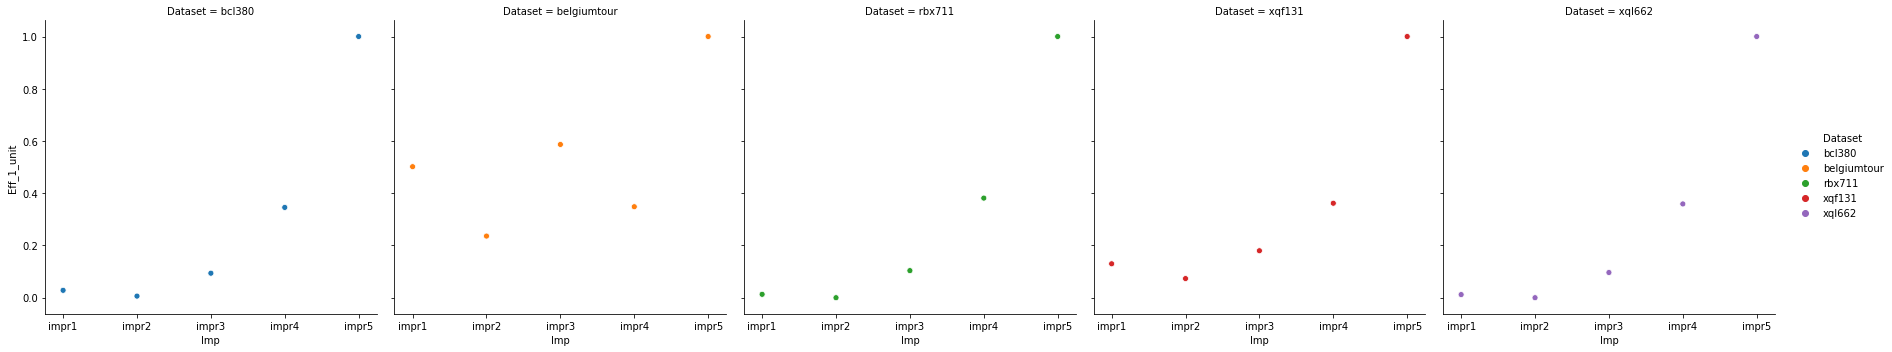

In [6]:
sns.relplot(x="Imp", y="Eff_1_unit", hue="Dataset",col="Dataset" ,data=benchmark_table);

# Running Results

ValueError: x and y must have same first dimension, but have shapes (1,) and (6,)

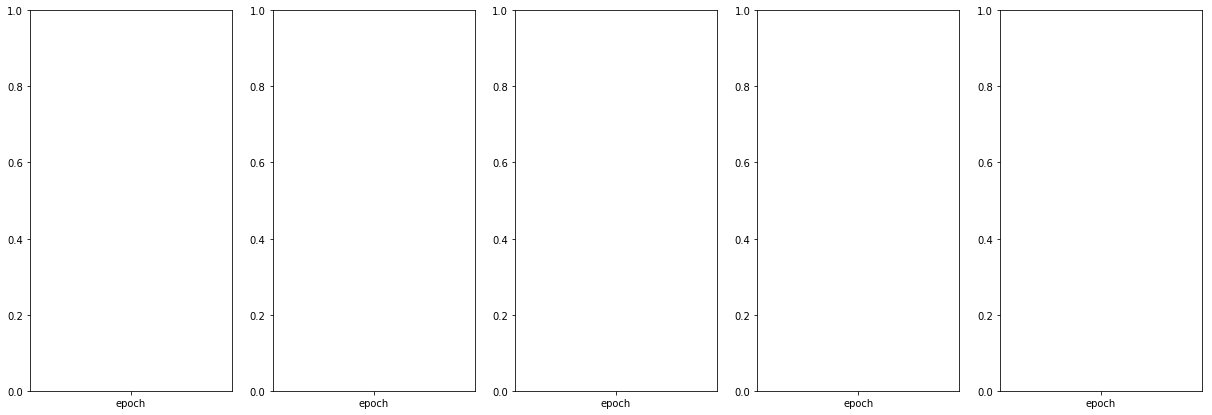

In [10]:
fig, axs = plt.subplots(1, len(table_dict.keys()), sharex=True, sharey=False,figsize=(21,7))

for i,Dataset in enumerate(table_dict.keys()):
    plot_ts_scal(Dataset,table_dict,axs[i])

 # Heuristic results

In [ ]:
#Set-up
heur_folder="Heuristics"
with cd(os.path.join(os.getcwd(),'..')):
    heur_path=os.path.join(os.path.join(os.getcwd(),heur_folder))
    assert os.path.isdir(heur_path), "Wrong folder"
#     print(scal_path)

In [ ]:
mat_files_short=[file for file in os.listdir(heur_path) if "running_res_time_secs-0.20" in file]
mat_files_long=[file for file in os.listdir(heur_path) if "running_res_time_secs-1.00" in file]


In [ ]:
Datasets=["rondrit016","rondrit048","rondrit070","rondrit127"]
dict_ts={}
for dataset,matfile in zip(Datasets,mat_files_short):
    
    dict_ts[Dataset]=load_matlab_ts(matfile,heur_path,Heur=True)
    
df=pd.DataFrame(dict_ts[Dataset])
df
# fig, axs = plt.subplots(1, len(dict_ts.keys()), sharex=True, sharey=False,figsize=(21,7))

# for i,Dataset in enumerate(dict_ts.keys()):
#     plot_ts_scal(Dataset,dict_ts,axs[i])


In [ ]:
"""Aux function to load Running res struct from .mat files
        as a pandas df"""
matfolder=heur_path; matfile=mat_files_long[0]
mat_str = loadmat(os.path.join(matfolder,matfile))
items=[item for item in mat_str['running_res'][0][0]]
fit_values=[items[1].flat[i] for i in range(items[1].shape[1])]
# Data
#Create dict from ts data
ts_dict={}
ts_dict["epoch"]=range(fit_values[1].shape[1])


# if(Heur==True):
#     for i in range(len(fit_values)):
#         ts_dict["IMPR{0}".format(i)]=fit_values[i].flatten()

# else:
#     for i,NIND in enumerate(NIND_vector):
#         ts_dict["{0}".format(NIND)]=fit_values[i].flatten()

In [ ]:
fit_values